# Lec4

## import python libs

In [62]:
import pandas
import configparser
import psycopg2

## connect to db

In [63]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [64]:
cur=conn.cursor()

# Q1

In [65]:
q1_sql = """
            select * from gp6.student 
"""

In [66]:
df_student=pandas.read_sql_query(q1_sql,conn)
df_student[:]

,s_email,s_name,major
0,toriwhite@jmu.edu,Tori White,IA
1,marksmith@jmu.edu,Mark Smith,IA
2,sarablack@jmu.edu,Sara Black,IA
3,billjones@jmu.edu,Bill Jones,IA


## Q2

In [67]:
q2_sql = """
                select gp6.professor.p_name,
                    gp6.course.c_name 
                from gp6.professor
                inner join gp6.course
                on gp6.professor.p_email = gp6.course.p_email
                
                """

print(q2_sql)


                select gp6.professor.p_name,
                    gp6.course.c_name 
                from gp6.professor
                inner join gp6.course
                on gp6.professor.p_email = gp6.course.p_email
                
                


In [101]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Stephen Marrin,Issues in Intelligence
1,Orlandrew Danzell,Anti-Money Laundering
2,Noel Hendrickson,Counterfactual Reasoning
3,Kathleen Moore,Cyber Intelligence
4,Kathleen Moore,Data Mining


## Q3

In [103]:
q3_sql = """
                select count(c_num) as enrolled, 
                c_num 
                from gp6.enroll_list
                group by c_num
        """

<AxesSubplot:xlabel='c_num'>

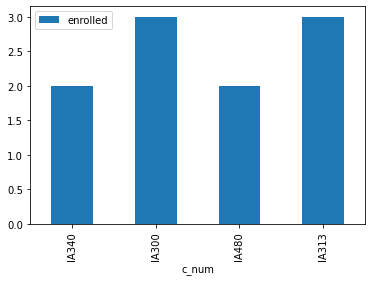

In [104]:
df = pandas.read_sql_query(q3_sql,conn)
df.plot.bar(x='c_num',y='enrolled')

## Q4

In [105]:
q4_sql = """
                select gp6.professor.p_name,
                    count(gp6.course.c_name) as num_c
                from gp6.professor
                inner join gp6.course
                on gp6.professor.p_email = gp6.course.p_email
                group by gp6.professor.p_name
                order by num_c desc
                """

print(q4_sql)


                select gp6.professor.p_name,
                    count(gp6.course.c_name) as num_c
                from gp6.professor
                inner join gp6.course
                on gp6.professor.p_email = gp6.course.p_email
                group by gp6.professor.p_name
                order by num_c desc
                


In [106]:
df = pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_c
0,Kathleen Moore,2
1,Noel Hendrickson,1
2,Stephen Marrin,1
3,Orlandrew Danzell,1


<AxesSubplot:xlabel='p_name'>

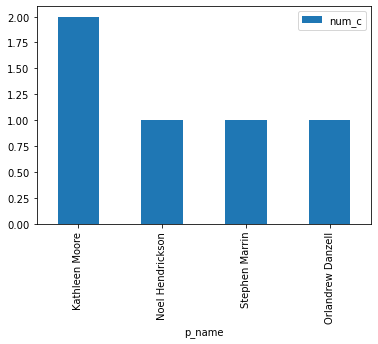

In [107]:
df = pandas.read_sql_query(q4_sql,conn)
df.plot.bar(x='p_name',y='num_c')

## q5

In [129]:
q5_sql_professor = """
            insert into gp6.professor(p_email, p_name, p_office)
            values ('{}','{}','{}')
            """.format('weixx@jmu.edu', 'Xuebin Wei', 'isat/cs112')
                    
print(q5_sql_professor)


            insert into gp6.professor(p_email, p_name, p_office)
            values ('weixx@jmu.edu','Xuebin Wei','isat/cs112')
            


In [130]:
cur.execute(q5_sql_professor)

In [131]:
conn.commit()

In [132]:
df = pandas.read_sql_query('select * from gp6.professor',conn)

df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,isat/cs107
1,hendrinx@jmu.edu,Noel Hendrickson,isat/cs317
2,marrinsp@jmu.edu,Stephen Marrin,engeo2104
3,moore8ka@jmu.edu,Kathleen Moore,isat/cs116
4,weixx@jmu.edu,Xuebin Wei,isat/cs112


In [158]:
q5_sql_course = """
                insert into gp6.course(c_num, c_name, c_room, p_email)
                values ('{}','{}','{}','{}')
                """.format('IA241', 'Intro to Python', 'virtual', 'weixx@jmu.edu')
         
print(q5_sql_course)


                insert into gp6.course(c_num, c_name, c_room, p_email)
                values ('IA241','Intro to Python','virtual','weixx@jmu.edu')
                


In [160]:
cur.execute(q5_sql_course)

In [161]:
conn.commit()

In [162]:
df = pandas.read_sql_query('select * from gp6.course',conn)

df[:]

,c_num,c_name,c_room,p_email
0,IA300,Issues in Intelligence,isat/cs150,marrinsp@jmu.edu
1,IA480,Anti-Money Laundering,isat/cs148,danzelox@jmu.edu
2,IA313,Counterfactual Reasoning,engeo1204,hendrinx@jmu.edu
3,IA365,Cyber Intelligence,virtual,moore8ka@jmu.edu
4,IA340,Data Mining,hhs112,moore8ka@jmu.edu
5,IA241,Intro to Python,virtual,weixx@jmu.edu


## Q6

In [166]:
q6_sql_course = """
                    update gp6.course
                    set p_email = '{}'
                    where p_email = '{}'
                 """.format('weixx@jmu.edu','moore8ka@jmu.edu')
print(q6_sql_course)


                    update gp6.course
                    set p_email = 'weixx@jmu.edu'
                    where p_email = 'moore8ka@jmu.edu'
                 


In [167]:
cur.execute(q6_sql_course)

In [168]:
conn.commit()

In [169]:
df = pandas.read_sql_query('select * from gp6.course',conn)

df[:]

,c_num,c_name,c_room,p_email
0,IA300,Issues in Intelligence,isat/cs150,marrinsp@jmu.edu
1,IA480,Anti-Money Laundering,isat/cs148,danzelox@jmu.edu
2,IA313,Counterfactual Reasoning,engeo1204,hendrinx@jmu.edu
3,IA241,Intro to Python,virtual,weixx@jmu.edu
4,IA365,Cyber Intelligence,virtual,weixx@jmu.edu
5,IA340,Data Mining,hhs112,weixx@jmu.edu


In [175]:
q6_sql_professor = """
                      delete from gp6.professor 
                      where p_email = 'moore8ka@jmu.edu'
                      """
print(q6_sql_professor)


                      delete from gp6.professor 
                      where p_email = 'moore8ka@jmu.edu'
                      


In [176]:
cur.execute(q6_sql_professor)

In [177]:
conn.commit()

In [178]:
df = pandas.read_sql_query('select * from gp6.professor',conn)

df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,isat/cs107
1,hendrinx@jmu.edu,Noel Hendrickson,isat/cs317
2,marrinsp@jmu.edu,Stephen Marrin,engeo2104
3,weixx@jmu.edu,Xuebin Wei,isat/cs112
